# Data Preprocessing

## Download Dataset

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#Diff and Message for Training
id = '1gaDee3qP_OUhpFsFrAXR1QtoLdAqbteS'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_diff_26208.csv')

id = '1GhbL0M2kIzSMuSKRgloH8-NtCjXViq2O'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_msg_26208.csv')

#Diff and Message for Testing
id = '1BZf1hw9ugqXI3VWVZDbmRr0P4qn8qh6D'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_diff_3000.csv')

id = '181xwJV5nVLrMEzRr9hqPQBFJmkbpAzBG'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_msg_3000.csv')

import pandas as pd

df_diff_train = pd.read_csv('train_diff_26208.csv', sep="\r\t", header=None)
df_msg_train = pd.read_csv('train_msg_26208.csv', sep="\r\t", header=None)
df_diff_test = pd.read_csv('test_diff_3000.csv', sep="\r\t", header=None)
df_msg_test = pd.read_csv('test_msg_3000.csv', sep="\r\t", header=None)


diff_train = df_diff_train[0].tolist()
msg_train = df_msg_train[0].tolist()
diff_test = df_diff_test[0].tolist()
msg_test = df_msg_test[0].tolist()
 

print("Training:", len(diff_train), len(msg_train))
print("Testing:", len(diff_test), len(msg_test))


print(diff_train[0])

print(msg_train[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Training: 26208 26208
Testing: 3000 3000
new file mode 100755 <nl> index 0000000 . . d125c52 <nl> Binary files / dev / null and b / art / intro . png differ <nl>
Added intro image .


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [0]:
id = '17sIU8iKhq3Nln8BrrrOoD-SwoVGmmpV3'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AutoNet2.pt')

## Data Preprocessing


In [2]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#For diff, we only want to keep the text; For Commit Message, we keep the whole sentences.

# diff & msg: Case Folding
diff_train = [i.lower() for i in diff_train]
msg_train = [i.lower() for i in msg_train]
diff_test = [i.lower() for i in diff_test]
msg_test = [i.lower() for i in msg_test]

# diff & msg: Punctuation Removal
def remove_punctuation(x):
  #remove '<nl>' label 
  cleaner = re.compile('<.*?>')
  x = re.sub(cleaner,'', x) 
  x = re.sub(r'[^\w\s]','', x)
  return x

diff_train = [remove_punctuation(i) for i in diff_train]
msg_train = [remove_punctuation(i) for i in msg_train]
diff_test = [remove_punctuation(i) for i in diff_test]
msg_test = [remove_punctuation(i) for i in msg_test]
# for s in range(0,5):
#   print(diff_train[s]) 
  
# diff: Remove the "mmm a"
for i in range(0,len(diff_train)):
  if "mmm a" in diff_train[i]:
    diff_train[i]=diff_train[i].replace("mmm a  ","")

# for s in range(0,10):
#   print(diff_train[s]) 

# diff & msg: Tokenization
diff_train = [word_tokenize(i) for i in diff_train]
msg_train = [word_tokenize(i) for i in msg_train]
diff_test = [word_tokenize(i) for i in diff_test]
msg_test = [word_tokenize(i) for i in msg_test]

# for s in range(0,5):
#   print(diff_train[s]) 

# diff & msg: Stopwords Removal
stop_words = sw.words()
diff_train_remove_stopwords=[]
for diffs in diff_train:
    filtered_diffs = [i for i in diffs if not i in stop_words]
    diff_train_remove_stopwords.append(filtered_diffs)

msg_train_remove_stopwords=[]
for msgs in msg_train:
    filtered_msgs = [i for i in msgs if not i in stop_words]
    msg_train_remove_stopwords.append(filtered_msgs)

diff_test_remove_stopwords=[]
for diffs in diff_test:
    filtered_diffs = [i for i in diffs if not i in stop_words]
    diff_test_remove_stopwords.append(filtered_diffs)

msg_test_remove_stopwords=[]
for msgs in msg_test:
    filtered_msgs = [i for i in msgs if not i in stop_words]
    msg_test_remove_stopwords.append(filtered_msgs)

# for s in range(0,5):
#   print(diff_train_remove_stopwords[s]) 

#Lemmatisation
lemmatizer = WordNetLemmatizer()
diff_train_lemmatisation = []
for tokens in diff_train_remove_stopwords:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    diff_train_lemmatisation.append(lemma_sentence)

msg_train_lemmatisation = []
for tokens in msg_train_remove_stopwords:
    lemma_sentences = [lemmatizer.lemmatize(w) for w in tokens ]
    msg_train_lemmatisation.append(lemma_sentences)

diff_test_lemmatisation = []
for tokens in diff_test_remove_stopwords:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    diff_test_lemmatisation.append(lemma_sentence)

msg_test_lemmatisation = []
for tokens in msg_test_remove_stopwords:
    lemma_sentences = [lemmatizer.lemmatize(w) for w in tokens ]
    msg_test_lemmatisation.append(lemma_sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
import json
import torch

json.dump(diff_train_lemmatisation, open('diff_train_lemmatisation.json', 'w'))
json.dump(msg_train_lemmatisation, open('msg_train_lemmatisation.json', 'w'))
json.dump(diff_test_lemmatisation, open('diff_test_lemmatisation.json', 'w'))
json.dump(msg_test_lemmatisation, open('msg_test_lemmatisation.json', 'w'))


In [0]:
import json

diff_train_lemmatisation = json.load(open('diff_train_lemmatisation.json'))
msg_train_lemmatisation = json.load(open('msg_train_lemmatisation.json'))
diff_test_lemmatisation = json.load(open('diff_test_lemmatisation.json'))
msg_test_lemmatisation = json.load(open('msg_test_lemmatisation.json'))


Word Frequency in diffs

Lots of "words" in the diffs are class name, function name or variable name in the code. We want to clean the data and remove the words with low frequency.

61550
60266
1284


(array([1.237e+03, 2.700e+01, 1.100e+01, 3.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([   50. ,  2924.5,  5799. ,  8673.5, 11548. , 14422.5, 17297. ,
        20171.5, 23046. , 25920.5, 28795. ]),
 <a list of 10 Patch objects>)

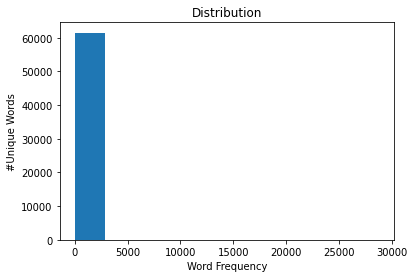

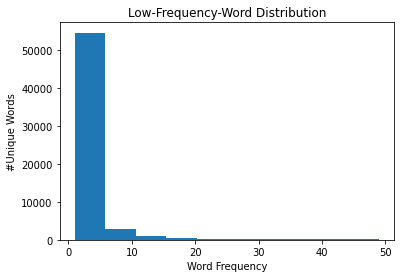

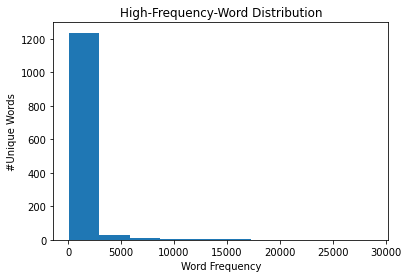

In [5]:
import matplotlib
import matplotlib.pyplot as plt
#check the distribution of words, <50 low-frequency words and >=50 high-frequency words
# total 61550; <50: 60266; >50: 1284
word_dic = {}
for diffs in diff_train_lemmatisation:
  for i in diffs:
    word_dic[i] = word_dic.get(i, 0) + 1
for diffs in diff_test_lemmatisation:
  for i in diffs:
    word_dic[i] = word_dic.get(i, 0) + 1
print (len(word_dic))

frequency = []
for i, num in word_dic.items():
  frequency.append(num)

plt.figure(0)
plt.xlabel('Word Frequency')
plt.ylabel('#Unique Words')
plt.title('Distribution')
plt.hist(frequency, bins = 10)

# <50 60266
low_frequency = []
for i in frequency:
  if i < 50:
    low_frequency.append(i)
print(len(low_frequency))

plt.figure(1)
plt.xlabel('Word Frequency')
plt.ylabel('#Unique Words')
plt.title('Low-Frequency-Word Distribution')
plt.hist(low_frequency, bins = 10)

# >=50 1284
high_frequency = []
for i in frequency:
  if i >= 50:
    high_frequency.append(i)
print(len(high_frequency))

plt.figure(2)
plt.xlabel('Word Frequency')
plt.ylabel('#Unique Words')
plt.title('High-Frequency-Word Distribution')
plt.hist(high_frequency, bins = 10)

Less-Frequency Words Removal

We will remove the words which appears less than 10 times

In [0]:
filtered_diff_train = []
for words in diff_train_lemmatisation:
  frequent_words = []
  for word in words:
    if word_dic[word] >= 10:
      frequent_words.append(word)
  filtered_diff_train.append(frequent_words)

filtered_diff_test = [] 
for words in diff_test_lemmatisation:
  frequent_words = []
  for word in words:
    if word_dic[word] >= 10:
      frequent_words.append(word)
  filtered_diff_test.append(frequent_words)

# for i in range(0,10):
#   print(filtered_diff_train[i])

We need to create classification labels for each data Since there are 1006 Java project, we just set 1006 projects.

In [7]:
import random

diff_train_labels = []
msg_train_labels = []

for j in range(int(26208/1006)): 
  for i in range(0,1006):
    diff_train_labels.append(i)

for i in range(0,52):
  diff_train_labels.append(i)
print(len(diff_train_labels))

for i in diff_train_labels:
    msg_train_labels.append(i)



26208


#Embeddings

Add Paddings

In [7]:
#diff_len = [len(line) for line in filtered_diff_train]
max_diff_length = max(len(line) for line in filtered_diff_train)
max_msg_length = max(len(line) for line in msg_train_lemmatisation)
print(max_diff_length, max_msg_length)
def add_paddings(corpus, seq_length):
    padding_list = []
    for line in corpus:
        if len(line) > seq_length:
            padding_list.append(line[:seq_length])
        else:
            for j in range(seq_length - len(line)):
                line.append("<PAD>")
            padding_list.append(line)
    return padding_list

padding_diff_train = add_paddings(filtered_diff_train, max_diff_length)
padding_diff_test = add_paddings(filtered_diff_test, max_diff_length)

padding_msg_train = add_paddings(msg_train_lemmatisation, max_msg_length)
padding_msg_test = add_paddings(msg_train_lemmatisation, max_msg_length)
# for i in range(0,2):
#   print(padding_diff_train[i])

# for i in range(0,2):
#   print(padding_msg_train[i])

77 20


Download

In [8]:
import gensim.downloader as api
word_emb_model = api.load("glove-wiki-gigaword-200")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Get Embeddings

In [9]:
import numpy as np
def get_embeddings(corpus, word_emb_model):
    emb_dim = word_emb_model.vector_size
    out = []
    for sentence in corpus:
        out_temp = []
        for word in sentence:
            try:
                out_temp.append(word_emb_model.wv[word])
            except:
                out_temp.append([0]*emb_dim)
    
        out.append(out_temp)
    return np.array(out)

diff_train_embedding = get_embeddings(padding_diff_train, word_emb_model)
diff_test_embedding = get_embeddings(padding_diff_test, word_emb_model)
msg_train_embedding = get_embeddings(padding_msg_train, word_emb_model)
msg_test_embedding = get_embeddings(padding_msg_test, word_emb_model)

# for i in range(0,2):
#   print(diff_train_embedding[i])

# for i in range(0,2):
#   print(msg_train_embedding[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


#Model

## Model for diff

Hyperparameter Selection

In [0]:
# n_diff_input = diff_train_embedding.shape[2] #50
# n_diff_hidden = 50 
# n_class = len(labels) #1006
# total_epoch = 5000
# learning_rate = 0.01

In [0]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from sklearn.metrics import accuracy_score
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# class DiffNet(nn.Module):
#     def __init__(self):
#         super(DiffNet, self).__init__()
#         self.lstm = nn.LSTM(n_diff_input, n_diff_hidden, num_layers=2, batch_first =True, dropout=0.2)
#         self.linear = nn.Linear(n_diff_hidden, n_class)

#     def forward(self, x):
#         x,_ = self.lstm(x)
#         x = self.linear(x[:,-1,:])
#         x = F.log_softmax(x, dim=1)
#         return x


# diffnet = DiffNet().to(device)
# criterion = nn.NLLLoss()
# optimizer = optim.Adam(diffnet.parameters(), lr=learning_rate)

# input_diff_batch_torch = torch.from_numpy(np.array(diff_train_embedding)).float().to(device)
# target_diff_batch_torch = torch.from_numpy(np.array(diff_train_labels)).view(-1).to(device)


# for epoch in range(total_epoch):   
#     diffnet.train()
#     outputs = diffnet(input_diff_batch_torch) 
#     loss = criterion(outputs, target_diff_batch_torch)
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()

#     diffnet.eval()
#     outputs = diffnet(input_diff_batch_torch) 
    
#     if epoch%100 == 99:
#         loss = criterion(outputs, target_diff_batch_torch)

#         print('Epoch: %d, loss: %.5f' %(epoch + 1, loss.item()))

# print('Finished Training diffs')


## Model for messages

Hyperparameter Selection

In [0]:
# n_msg_input = msg_train_embedding.shape[2]
# print(n_msg_input)
# n_msg_hidden = 50
# n_class = len(labels) #1006
# total_epoch = 5000
# learning_rate = 0.01

In [0]:
# class MsgNet(nn.Module):
#     def __init__(self):
#         super(MsgNet, self).__init__()
#         self.lstm = nn.LSTM(n_msg_input, n_msg_hidden, num_layers=2, batch_first =True, dropout=0.2)
#         self.linear = nn.Linear(n_msg_hidden, n_class)

#     def forward(self, x):
#         x,_ = self.lstm(x)
#         x = self.linear(x[:,-1,:])
#         x = F.log_softmax(x, dim=1)
#         return x


# msgnet = MsgNet().to(device)
# criterion = nn.NLLLoss()
# optimizer = optim.Adam(msgnet.parameters(), lr=learning_rate)

# input_msg_batch_torch = torch.from_numpy(np.array(msg_train_embedding)).float().to(device)
# target_msg_batch_torch = torch.from_numpy(np.array(msg_train_labels)).view(-1).to(device)


# for epoch in range(total_epoch):   
#     msgnet.train()
#     outputs = msgnet(input_msg_batch_torch) 
#     loss = criterion(outputs, target_msg_batch_torch)
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()

#     msgnet.eval()
#     outputs = msgnet(input_msg_batch_torch) 
    
#     if epoch%100 == 99:
#         loss = criterion(outputs, target_msg_batch_torch)

#         print('Epoch: %d, loss: %.5f' %(epoch + 1, loss.item()))

# print('Finished Training messages')


# Merged model

In [0]:
n_diff_input = diff_train_embedding.shape[2] #50
n_diff_hidden = 128
n_msg_input = msg_train_embedding.shape[2]  #50
n_msg_hidden = 128
total_epoch = 500
learning_rate = 0.00001
batch_size = 1024

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class TripletLoss(nn.Module):
    """
    Triplet loss
    Takes embeddings of an anchor sample, a positive sample and a negative sample
    """

    def __init__(self, margin = 1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    # def forward(self, anchor, positive, negative, size_average=True):
        # distance_positive = (anchor - positive).pow(2).sum(1)  # .pow(.5)
        # distance_negative = (anchor - negative).pow(2).sum(1)  # .pow(.5)
    def forward(self, distance_positive, distance_negative, size_average=True):

        losses = distance_positive - distance_negative + self.margin
        losses = F.relu(losses)
        # losses = max(0, distance_positive - distance_negative + self.margin)
       
        losses = losses.mean()
        # if size_average
        return losses #if size_average else losses.sum()


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.diff_lstm = nn.GRU(n_diff_input, n_diff_hidden, num_layers=2, batch_first =True)
        self.msg_lstm = nn.GRU(n_msg_input, n_msg_hidden, num_layers=2, batch_first =True)
        self.linear1 = nn.Linear(n_msg_hidden+n_diff_hidden, 64)
        self.linear2 = nn.Linear(64, 1)
        self.bn1 = nn.BatchNorm1d(64)
        self.act1 = nn.ReLU()
        self.act2 = nn.Sigmoid()

    def forward(self, diff, message):
        diff, _ = self.diff_lstm(diff)
        message, _ = self.msg_lstm(message)
        x = torch.cat([diff[:,-1,:], message[:,-1,:]], dim=1)
        x = self.linear1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        # x = self.act(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
# criterion = nn.TripletMarginLoss(margin=1.0, p=2)
criterion = TripletLoss().to(device)
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
# print(input_diff_batch_torch.shape, input_msg_batch_torch.shape)

# target_msg_batch_torch = torch.from_numpy(np.array(msg_train_labels)).view(-1).to(device)
input_diff_batch_torch = torch.from_numpy(np.array(diff_train_embedding[0:batch_size])).float().to(device)
input_msg_batch_torch = torch.from_numpy(np.array(msg_train_embedding[0:batch_size])).float().to(device)
# print(input_diff_batch_torch.shape[0])
    
  



**Model 1**

Hyperparameters selection:  </br>

```
n_diff_hidden = 128
n_msg_hidden = 128
total_epoch = 200
learning_rate = 0.00001
```

In [13]:
import numpy as np
del optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

nbatch = int(26208/batch_size)-1  # 24
epoch_list = []
loss_train_list = []
loss_test_list = []

for epoch in range(total_epoch): 
    epoch_list.append(epoch)
    sum_train_loss = 0  
    sum_test_loss = 0
    for i in range(nbatch):
    # for i in range(1):
      input_diff_batch_torch = torch.from_numpy(np.array(diff_train_embedding[int(i*batch_size):int((i+1)*batch_size)])).float().to(device)
      input_msg_batch_torch = torch.from_numpy(np.array(msg_train_embedding[int(i*batch_size):int((i+1)*batch_size)])).float().to(device)
      perm = torch.randperm(input_msg_batch_torch.size(0))
      permed_msg = input_msg_batch_torch[perm]
      net.train()
      outputs_positive = net(input_diff_batch_torch, input_msg_batch_torch) 
      outputs_negative = net(input_diff_batch_torch, permed_msg)
      # print(outputs_positive.mean(), outputs_negative.mean())
      # print(outputs_positive.mean().item(), outputs_negative.mean().item())
      # print(outputs_positive.mean() - outputs_negative.mean() + 1)
      loss = criterion(outputs_positive, outputs_negative)
      # print(loss)
      # print(outputs_positive.mean(), outputs_negative.mean())
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      sum_train_loss += loss.item()

      net.eval()
      outputs_positive = net(input_diff_batch_torch, input_msg_batch_torch) 
      outputs_negative = net(input_diff_batch_torch, permed_msg)
      loss = criterion(outputs_positive, outputs_negative)
      
      sum_test_loss += loss.item()

    loss_train_list.append(sum_train_loss/nbatch)
    loss_test_list.append(sum_test_loss/nbatch)
    
    print('Epoch: %d, training loss: %.6f, testing loss: %.6f' %(epoch + 1, sum_train_loss/nbatch, sum_test_loss/nbatch))
    # print('Epoch: %d, loss: %.5f' %(epoch + 1, sum_loss/int(26208/batch_size)))
        
print('Finished')


Epoch: 1, training loss: 1.000000, testing loss: 1.000000
Epoch: 2, training loss: 1.000000, testing loss: 1.000000
Epoch: 3, training loss: 1.000000, testing loss: 1.000000
Epoch: 4, training loss: 1.000000, testing loss: 1.000000
Epoch: 5, training loss: 1.000000, testing loss: 1.000000
Epoch: 6, training loss: 1.000000, testing loss: 1.000000
Epoch: 7, training loss: 1.000000, testing loss: 1.000000
Epoch: 8, training loss: 0.999999, testing loss: 1.000000
Epoch: 9, training loss: 1.000000, testing loss: 1.000000
Epoch: 10, training loss: 0.999999, testing loss: 0.999999
Epoch: 11, training loss: 0.999998, testing loss: 0.999999
Epoch: 12, training loss: 0.999999, testing loss: 0.999999
Epoch: 13, training loss: 1.000000, testing loss: 1.000000
Epoch: 14, training loss: 0.999999, testing loss: 1.000000
Epoch: 15, training loss: 0.999999, testing loss: 0.999999
Epoch: 16, training loss: 0.999999, testing loss: 0.999999
Epoch: 17, training loss: 0.999999, testing loss: 1.000000
Epoch:

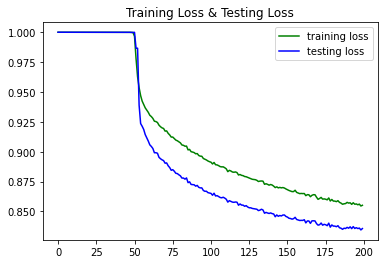

In [15]:
plt.plot(epoch_list, loss_train_list, 'g', label = 'training loss')
plt.plot(epoch_list, loss_test_list, 'b', label = 'testing loss')
plt.title('Training Loss & Testing Loss')
plt.legend()
plt.show()


**Model 2**

Hyperparameters selection:  </br>

```
n_diff_hidden = 128
n_msg_hidden = 128
total_epoch = 300
learning_rate = 0.00001
```

In [13]:
import numpy as np
del optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

nbatch = int(26208/batch_size)-1  # 24
epoch_list = []
loss_train_list = []
loss_test_list = []

for epoch in range(total_epoch): 
    epoch_list.append(epoch)
    sum_train_loss = 0  
    sum_test_loss = 0
    for i in range(nbatch):
    # for i in range(1):
      input_diff_batch_torch = torch.from_numpy(np.array(diff_train_embedding[int(i*batch_size):int((i+1)*batch_size)])).float().to(device)
      input_msg_batch_torch = torch.from_numpy(np.array(msg_train_embedding[int(i*batch_size):int((i+1)*batch_size)])).float().to(device)
      perm = torch.randperm(input_msg_batch_torch.size(0))
      permed_msg = input_msg_batch_torch[perm]
      net.train()
      outputs_positive = net(input_diff_batch_torch, input_msg_batch_torch) 
      outputs_negative = net(input_diff_batch_torch, permed_msg)
      # print(outputs_positive.mean(), outputs_negative.mean())
      # print(outputs_positive.mean().item(), outputs_negative.mean().item())
      # print(outputs_positive.mean() - outputs_negative.mean() + 1)
      loss = criterion(outputs_positive, outputs_negative)
      # print(loss)
      # print(outputs_positive.mean(), outputs_negative.mean())
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      sum_train_loss += loss.item()

      net.eval()
      outputs_positive = net(input_diff_batch_torch, input_msg_batch_torch) 
      outputs_negative = net(input_diff_batch_torch, permed_msg)
      loss = criterion(outputs_positive, outputs_negative)
      
      sum_test_loss += loss.item()

    loss_train_list.append(sum_train_loss/nbatch)
    loss_test_list.append(sum_test_loss/nbatch)
    
    print('Epoch: %d, training loss: %.6f, testing loss: %.6f' %(epoch + 1, sum_train_loss/nbatch, sum_test_loss/nbatch))
    # print('Epoch: %d, loss: %.5f' %(epoch + 1, sum_loss/int(26208/batch_size)))
        
print('Finished')


Epoch: 1, training loss: 1.000000, testing loss: 1.000000
Epoch: 2, training loss: 1.000001, testing loss: 1.000000
Epoch: 3, training loss: 1.000000, testing loss: 1.000000
Epoch: 4, training loss: 1.000000, testing loss: 1.000000
Epoch: 5, training loss: 1.000000, testing loss: 1.000000
Epoch: 6, training loss: 1.000000, testing loss: 1.000000
Epoch: 7, training loss: 0.999999, testing loss: 0.999999
Epoch: 8, training loss: 0.999999, testing loss: 0.999999
Epoch: 9, training loss: 1.000000, testing loss: 1.000000
Epoch: 10, training loss: 0.999999, testing loss: 1.000000
Epoch: 11, training loss: 0.999999, testing loss: 1.000000
Epoch: 12, training loss: 0.999999, testing loss: 0.999999
Epoch: 13, training loss: 0.999999, testing loss: 0.999999
Epoch: 14, training loss: 0.999999, testing loss: 0.999999
Epoch: 15, training loss: 0.999999, testing loss: 0.999999
Epoch: 16, training loss: 0.999999, testing loss: 0.999999
Epoch: 17, training loss: 0.999999, testing loss: 0.999999
Epoch:

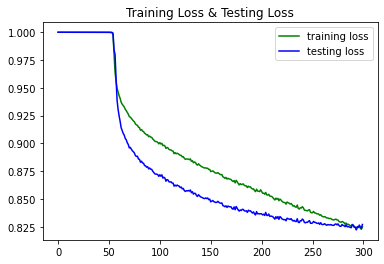

In [14]:
plt.plot(epoch_list, loss_train_list, 'g', label = 'training loss')
plt.plot(epoch_list, loss_test_list, 'b', label = 'testing loss')
plt.title('Training Loss & Testing Loss')
plt.legend()
plt.show()


# Save Model

In [14]:
torch.save(net, 'AutoNet1.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [15]:
torch.save(net, 'AutoNet2.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


# Load Model

In [0]:
autoNet = torch.load('AutoNet2.pt')
autoNet.eval()